In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sts
import matplotlib.pyplot as plt
import gmaps
import plotly.express as px
import seaborn as sns


In [2]:
world_df= pd.read_csv("../Resources/owid-covid-data.csv")


updated_world_df=world_df.drop(["iso_code", "total_cases", "new_cases","new_deaths_per_million","total_tests","new_tests",
                                "new_tests_smoothed_per_thousand","population","median_age","aged_70_older",
                                "extreme_poverty","diabetes_prevalence","female_smokers","male_smokers",
                               "handwashing_facilities","hospital_beds_per_thousand","life_expectancy",
                               "new_tests_smoothed","new_tests_per_thousand","tests_units","total_deaths",
                               "new_deaths","total_cases_per_million","new_cases_per_million"], axis=1)

updated_world_df=updated_world_dfupdated_world_df=updated_world_df.rename(columns={"location":"Country", "continent":"Continent","date":"Date",
                                                  "total_deaths_per_million":"Total Deaths Per Million",
                                                  "total_tests_per_thousand":"Total Test Per Thousands",
                                                 "population_density":"Population Density","aged_65_older":"Aged 65 or older",
                                                 "gdp_per_capita":"GDP Per Capita","cvd_death_rate":"Covid Death Rate",
                                                 "stringency_index":"Stringency Index"})

#updated_world_df.fillna(0, inplace=True)

updated_world_df.head()

,Continent,Country,Date,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate
0,Asia,Afghanistan,2019-12-31,0.0,NaN,NaN,54.422,2.581,1803.987,597.029
1,Asia,Afghanistan,2020-01-01,0.0,NaN,0.0,54.422,2.581,1803.987,597.029
2,Asia,Afghanistan,2020-01-02,0.0,NaN,0.0,54.422,2.581,1803.987,597.029
3,Asia,Afghanistan,2020-01-03,0.0,NaN,0.0,54.422,2.581,1803.987,597.029
4,Asia,Afghanistan,2020-01-04,0.0,NaN,0.0,54.422,2.581,1803.987,597.029


In [3]:
#Number Hospital Beds is based on the lastest year per Country

data = pd.read_csv("../Resources/data.csv")

who_df = data.iloc[data.groupby("Country")["Year"].agg(pd.Series.idxmax)]
who_df.reset_index(drop=True).set_index("Country")
who_df=who_df.rename(columns={"Hospital beds (per 10 000 population)":"Hospital Beds (per 10K people)"})
hospital_beds_df=who_df.drop(["Year"], axis=1)

hospital_beds_df.head()

,Country,Hospital Beds (per 10K people)
0,Afghanistan,5
16,Albania,29
29,Algeria,19
31,Angola,8
32,Antigua and Barbuda,38


In [4]:
#Smoking Percentage is based on the lastest year per Country

smokingdata = pd.read_csv("../Resources/smokingdata.csv")

smokingdata_df = smokingdata.iloc[smokingdata.groupby("Country")["Year"].agg(pd.Series.idxmax)]

clean_smoking_data = smokingdata_df.drop(["Estimate of current cigarette smoking prevalence (%).1", "Estimate of current cigarette smoking prevalence (%).2", 
                                       "Estimate of current tobacco smoking prevalence (%)", "Estimate of current tobacco smoking prevalence (%).1", 
                                       "Estimate of current tobacco smoking prevalence (%).2", "Estimate of current tobacco use prevalence (%)", 
                                       "Estimate of current tobacco use prevalence (%).1", "Estimate of current tobacco use prevalence (%).2"], axis=1)

 
clean_smoking_data=clean_smoking_data.rename(columns={"Estimate of current cigarette smoking prevalence (%)":"Smoking Prevalence (%)"})
smoking_data = clean_smoking_data
smoking_prevalence=list(smoking_data["Smoking Prevalence (%)"])
smoking_percentage=[]

for x in smoking_prevalence:
    y=x.split("[")
    smoking_percentage.append(y[0])
    

    
column_values = pd.Series(smoking_percentage)
smoking_data.insert(loc=2, column="Smoking Percetage", value=column_values)
smoking_year_df=smoking_data.drop(["Smoking Prevalence (%)"], axis=1)

smoking_df=smoking_year_df.drop(["Year"], axis=1)

smoking_df.head()

,Country,Smoking Percetage
1,Albania,11.20
7,Algeria,15.20
13,Andorra,21.40
19,Argentina,31.40
25,Armenia,6.00


In [5]:
world_df=pd.read_csv("../Resources/dsh_simple.csv")

world_df=world_df[["Countryname","IfclosedduetoCOVID19whend","Statusof Schoolsaresomeall (copy) (group)",
          "Latitude (generated)","Longitude (generated)","Incomelevelname"]]

income_level_df=world_df.rename(columns={"Countryname":"Country", "Latitude (generated)":"Latitude", 
                      "Longitude (generated)": "Longitude", "Incomelevelname": "Income Level",
                        "Statusof Schoolsaresomeall (copy) (group)":"School Status"})
income_df=income_level_df.drop(["IfclosedduetoCOVID19whend"], axis =1)

income_df.head()

,Country,School Status,Latitude,Longitude,Income Level
0,Eritrea,Closed,15.9820,38.0200,Low income
1,Guinea-Bissau,Closed,12.1910,-14.4750,Low income
2,San Marino,Closed,43.9420,12.4611,High income
3,Georgia,Closed,42.0500,43.5760,Upper middle income
4,Italy,Closed,44.3713,11.1084,High income


In [6]:
combined_df=pd.merge(updated_world_df,hospital_beds_df,on="Country",how="left").merge(smoking_df,on="Country",how="left" ).merge(income_df,on="Country",how="left")

combined_df.head()

,Continent,Country,Date,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
0,Asia,Afghanistan,2019-12-31,0.0,NaN,NaN,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
1,Asia,Afghanistan,2020-01-01,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
2,Asia,Afghanistan,2020-01-02,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
3,Asia,Afghanistan,2020-01-03,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income
4,Asia,Afghanistan,2020-01-04,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,5.0,NaN,Closed,34.023,65.5267,Low income


In [7]:
#get unique country names & get max total deaths per million/gpd/pop.density for each country

max_deaths_country=  combined_df.groupby(["Country"]).agg({"Total Deaths Per Million": "max","Income Level":"unique", "Continent": "unique"})
max_pop_country=  combined_df.groupby(["Country"]).agg({"Population Density": "max"})
max_gdp_country=  combined_df.groupby(["Country"]).agg({"GDP Per Capita": "max" })

#cleaning data
income=[]
continent=[]
max_combined_country = pd.merge(max_deaths_country,max_gdp_country, how= "outer", on = 'Country')
max_combined_country = pd.merge(max_combined_country,max_pop_country, how = 'outer', on = 'Country')
for index, row in max_combined_country.iterrows():
    x=row["Income Level"][0]
    y=row ["Continent"][0]
    income.append(x)
    continent.append(y)
max_combined_country["Country Income Level"]=income
max_combined_country["Continent"]=continent
max_combined_country_clean=max_combined_country.dropna(how = 'any')
max_combined_country_clean=max_combined_country_clean.reset_index()
#max_combined_country_clean.sort_values(by=['Country Income Level'], kind= '')********
max_combined_country_clean.head(10) 

#sns.set()
#with sns.cubehelix_palette(8, start=.5, rot=-.75,reverse=False):
    #plt.figure(figsize=(10,5))
    #sns.scatterplot(data= max_combined_country_clean, x="GDP Per Capita",y="Total Deaths Per Million",hue= "Country Income Level",alpha =1)
    #plt.title("GDP per Capita vs Total Deaths per million")
    #plt.xlabel("GDP Per capita (Country)")
    #plt.ylabel("Total deaths per million")
    #plt.ylim(-5,300)

,Country,Total Deaths Per Million,Income Level,Continent,GDP Per Capita,Population Density,Country Income Level
0,Afghanistan,14.925,[Low income],Asia,1803.987,54.422,Low income
1,Albania,15.289,[Upper middle income],Europe,11803.431,104.871,Upper middle income
2,Algeria,19.270,[Upper middle income],Africa,13913.839,17.348,Upper middle income
3,Angola,0.274,[Lower middle income],Africa,5819.495,23.890,Lower middle income
4,Antigua and Barbuda,30.635,[High income],North America,21490.943,231.845,High income
5,Argentina,22.369,[Upper middle income],South America,18933.907,16.177,Upper middle income
6,Armenia,121.489,[Upper middle income],Asia,8787.580,102.931,Upper middle income
7,Aruba,28.099,[High income],North America,35973.781,584.800,High income
8,Australia,4.000,[High income],Oceania,44648.710,3.202,High income
9,Austria,76.612,[High income],Europe,45436.686,106.749,High income


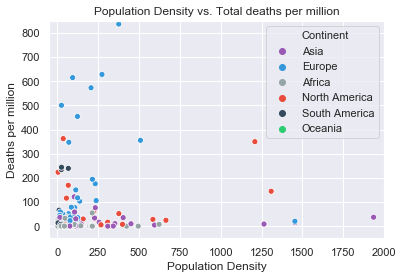

<Figure size 720x288 with 0 Axes>

In [9]:
sns.set()
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

with sns.color_palette(flatui):
    sns.scatterplot(max_combined_country_clean["Population Density"],max_combined_country_clean["Total Deaths Per Million"], 
                    hue=max_combined_country_clean["Continent"],alpha = 1 )
    plt.ylim(-50, 850)
    plt.xlim(-50,2000)
    plt.title("Population Density vs. Total deaths per million")
    plt.xlabel("Population Density")
    plt.ylabel("Deaths per million")
    plt.figure(figsize=(10,4))
    plt.show()
    
fig = px.scatter(max_combined_country_clean,x='Population Density',y='Total Deaths Per Million',facet_col= 'Country Income Level'
                , hover_name= "Country",color= "Continent", width = 1500)
fig.update_layout(title="Population Density vs. Total deaths per million", )
fig.update_yaxes(range=[-2, 700])
fig.update_xaxes(range=[-50, 2000])
fig.show()


